In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/arunkumaraluru/Desktop/Cryptocurrency Prediction AI./Data.csv")
df.head()

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT
0,1.640560e+12,12-27-2021,XRP-USDT,0.9200,0.9237,0.9200,0.9226,2384512.0,2.198450e+06
1,1.640480e+12,12-26-2021,XRP-USDT,0.9252,0.9334,0.9052,0.9200,163438501.0,1.499400e+08
2,1.640390e+12,12-25-2021,XRP-USDT,0.9114,0.9350,0.8981,0.9252,250074945.0,2.302303e+08
3,1.640300e+12,12-24-2021,XRP-USDT,0.9941,0.9966,0.8964,0.9115,567234092.0,5.377035e+08
4,1.640220e+12,12-23-2021,XRP-USDT,0.9538,1.0167,0.9372,0.9941,479436230.0,4.729372e+08


In [3]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns', '\n')
print(f'The dataset contains {df.isnull().sum().sum()} missing values', '\n')
print(f'The dataset contains {df.duplicated().sum()} duplicated rows', '\n')

The dataset contains 1334 rows and 9 columns 

The dataset contains 0 missing values 

The dataset contains 0 duplicated rows 



In [4]:
print(f'The dataset contains {df["symbol"].nunique()} unique symbols', '\n')

The dataset contains 1 unique symbols 



In [5]:
print(f'The data runs from {df["date"].min()} to {df["date"].max()}')

The data runs from 1-1-2019 to 9-9-2021


In [6]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

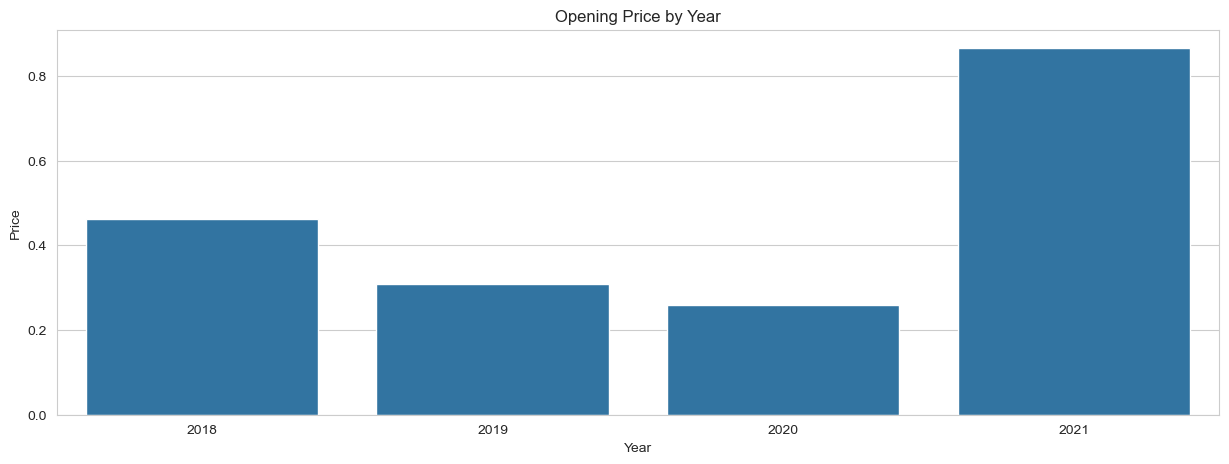

In [7]:
# Opening price by year
def open_price_by_year(df):
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.barplot(x='year', y='open', data=df, ci=None)
    ax.set_xlabel('Year')
    ax.set_ylabel('Price')
    ax.set_title('Opening Price by Year')
    plt.show();

open_price_by_year(df)

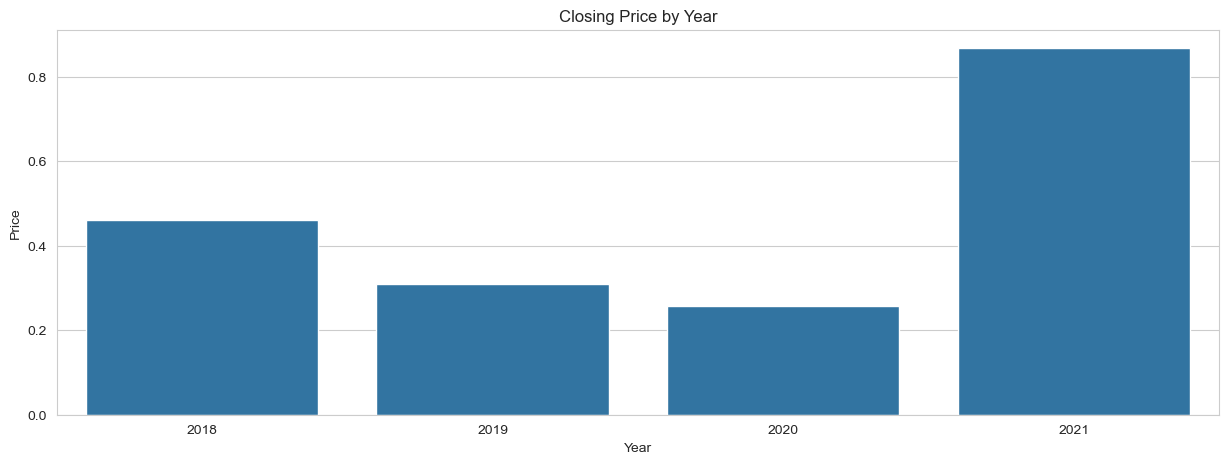

In [8]:
# Closing price by year
def close_price_by_year(df):
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.barplot(x='year', y='close', data=df, ci=None)
    ax.set_xlabel('Year')
    ax.set_ylabel('Price')
    ax.set_title('Closing Price by Year')
    plt.show();

close_price_by_year(df)

In [9]:
# Ploting volume xrp and volume usd
sns.scatterplot(x='Volume XRP', y='Volume USDT', data=df)

<Axes: xlabel='Volume XRP', ylabel='Volume USDT'>

In [10]:
# Ploting volume xrp and volume usd
sns.barplot(x='year', y='Volume XRP', data=df);

In [11]:
sns.barplot(x='year', y='Volume USDT', data=df);

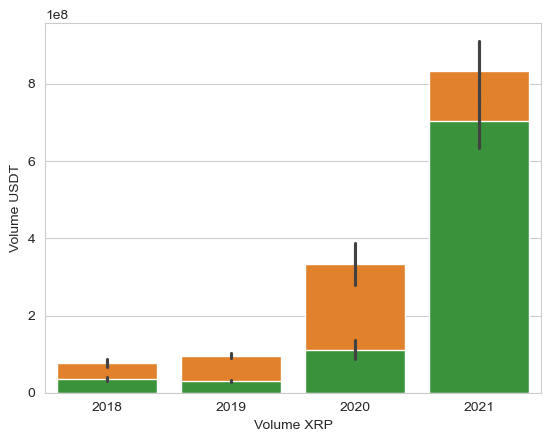

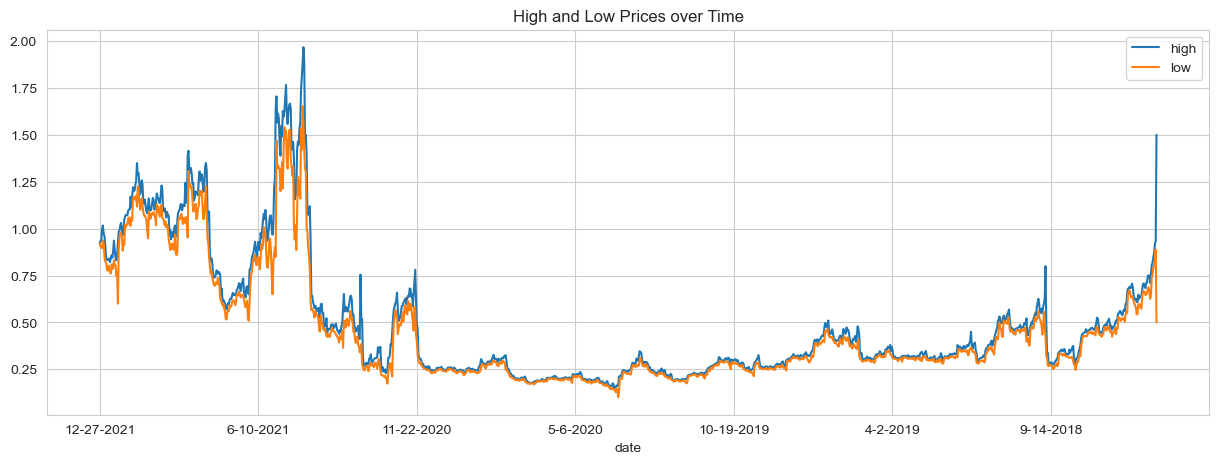

In [12]:
# High and Low prices over time
high_low = df[['date', 'high', 'low']]

high_low.set_index('date').plot(figsize=(15, 5), title='High and Low Prices over Time');
# Show the plot
plt.show()

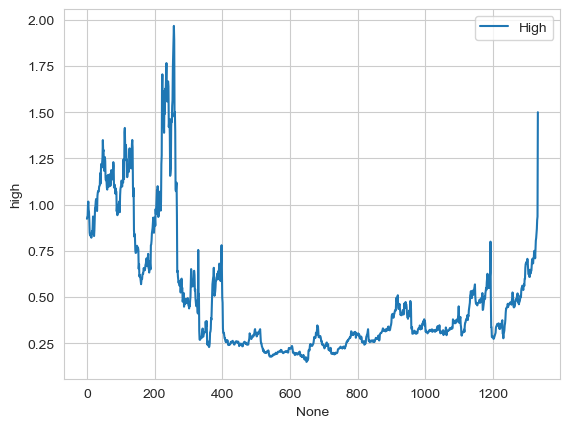

In [13]:
x = high_low.index # this is the index of the dataframe ie date
sns.lineplot(x=x, y='high', data=high_low, label='High')
plt.show()

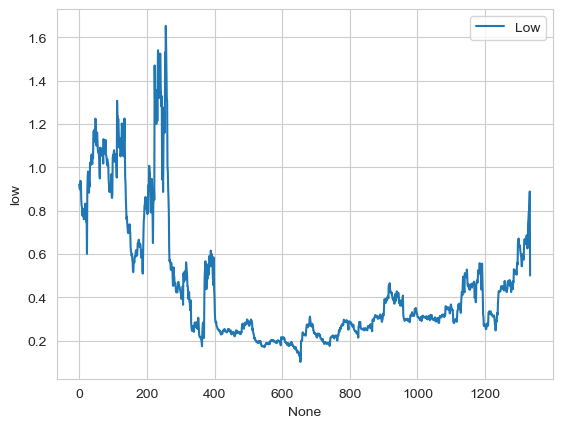

In [14]:
sns.lineplot(x=x, y='low', data=high_low, label='Low')
plt.show()

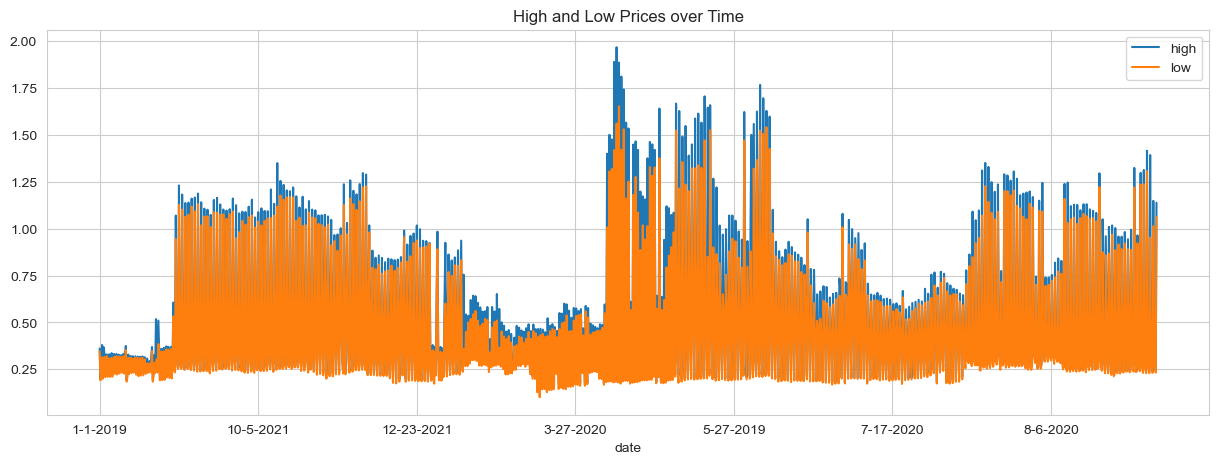

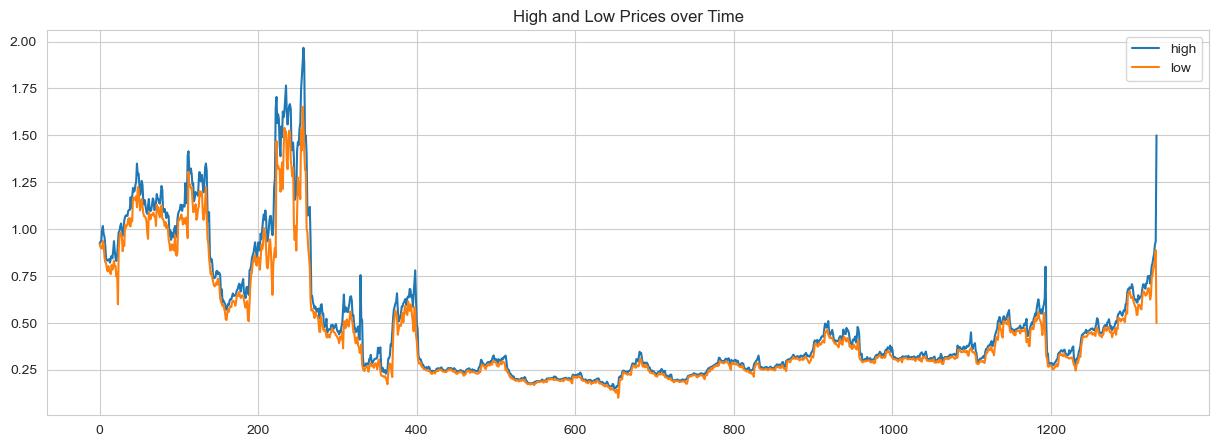

In [15]:
high_low.groupby('date').mean().plot(figsize=(15, 5), title='High and Low Prices over Time');
high_low.plot(figsize=(15, 5), title='High and Low Prices over Time');
plt.show()

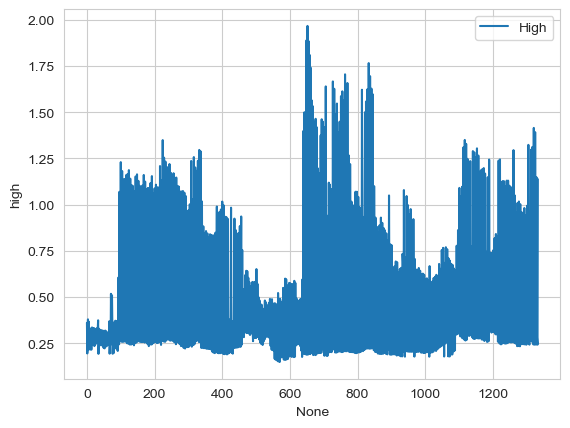

In [16]:
sns.lineplot(x=x, y='high', data=high_low.groupby('date').mean(), label='High')
plt.show()

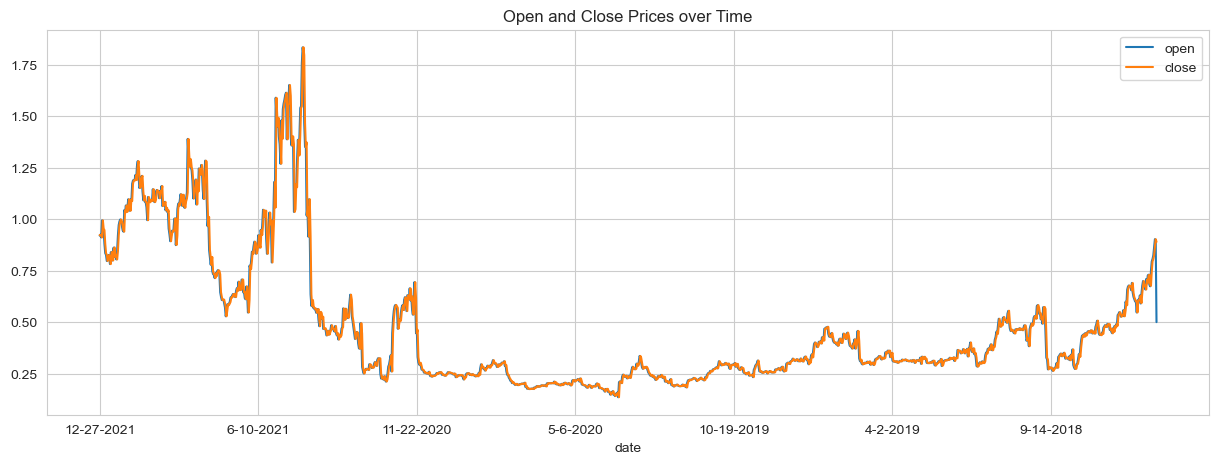

In [17]:
open_close = df[['date', 'open', 'close']]

open_close.set_index('date').plot(figsize=(15, 5), title='Open and Close Prices over Time');
plt.show()

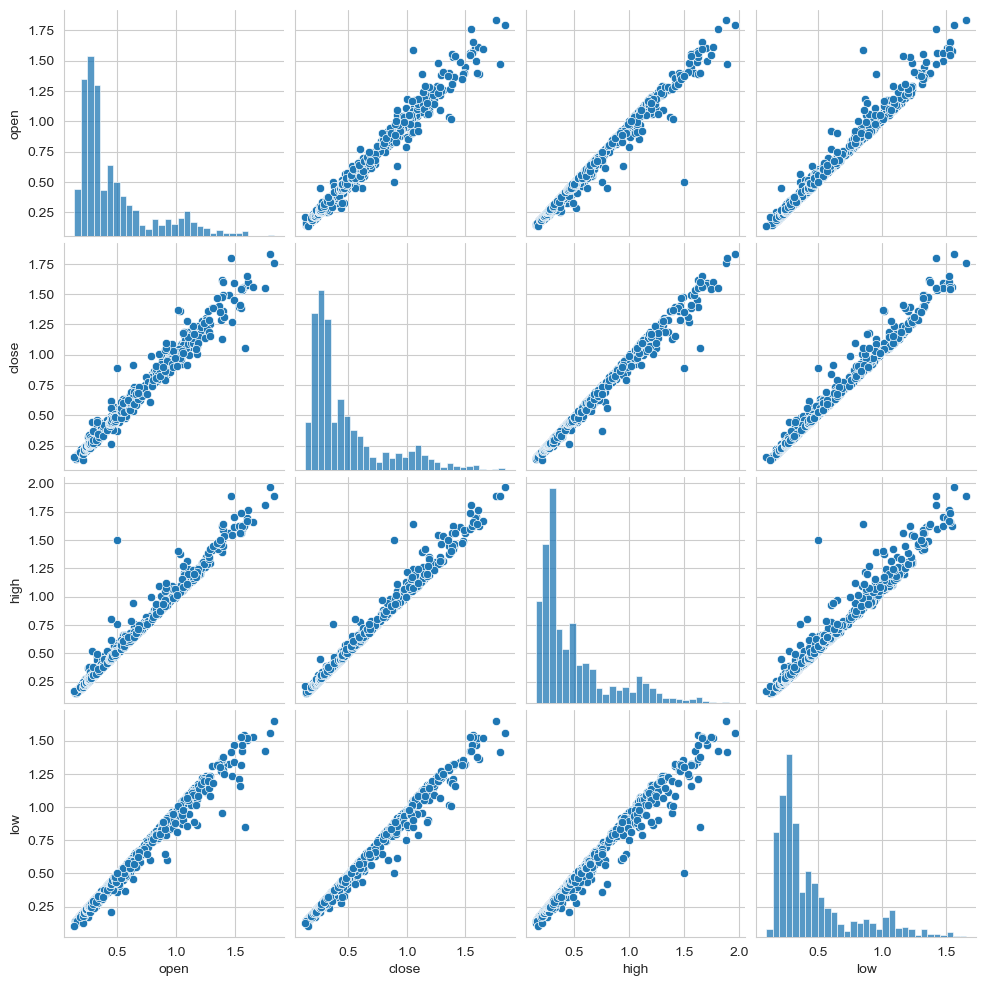

In [18]:
sns.pairplot(df[['open', 'close', 'high', 'low']]);
plt.show()

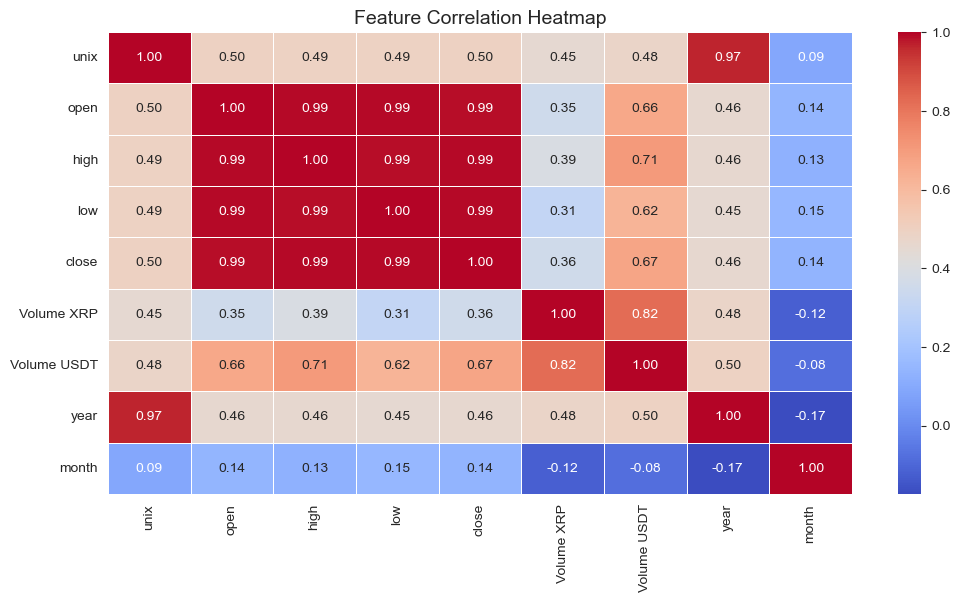

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns (e.g., 'date' or categorical features)
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)

# Add title
plt.title("Feature Correlation Heatmap", fontsize=14)

# Show plot
plt.show()

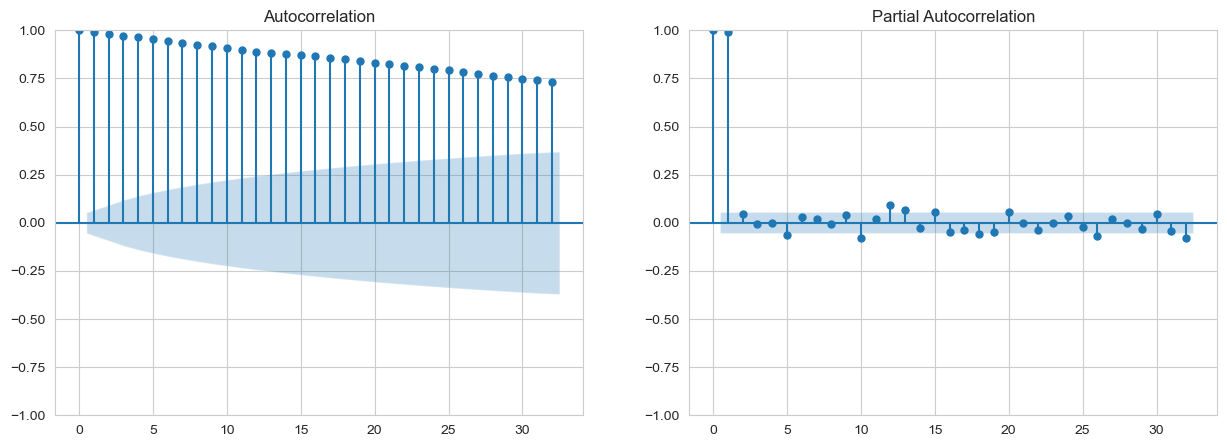

In [20]:
#Time Series Analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def plot_acf_pacf(df):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    plot_acf(df, ax=ax[0])
    plot_pacf(df, ax=ax[1])
    plt.show();

plot_acf_pacf(df['close'])

In [21]:
corr['close'].sort_values(ascending=False).head(10)


close          1.000000
high           0.994491
low            0.994198
open           0.990702
Volume USDT    0.671461
unix           0.498173
year           0.457874
Volume XRP     0.355914
month          0.135441
Name: close, dtype: float64

In [22]:
high_corr_features = corr.index[abs(corr['close']) > 0.5]
high_corr_features = high_corr_features.drop('close')
high_corr_features

Index(['open', 'high', 'low', 'Volume USDT'], dtype='object')

Mean squared error: 0.00
Coefficient of determination: 0.99


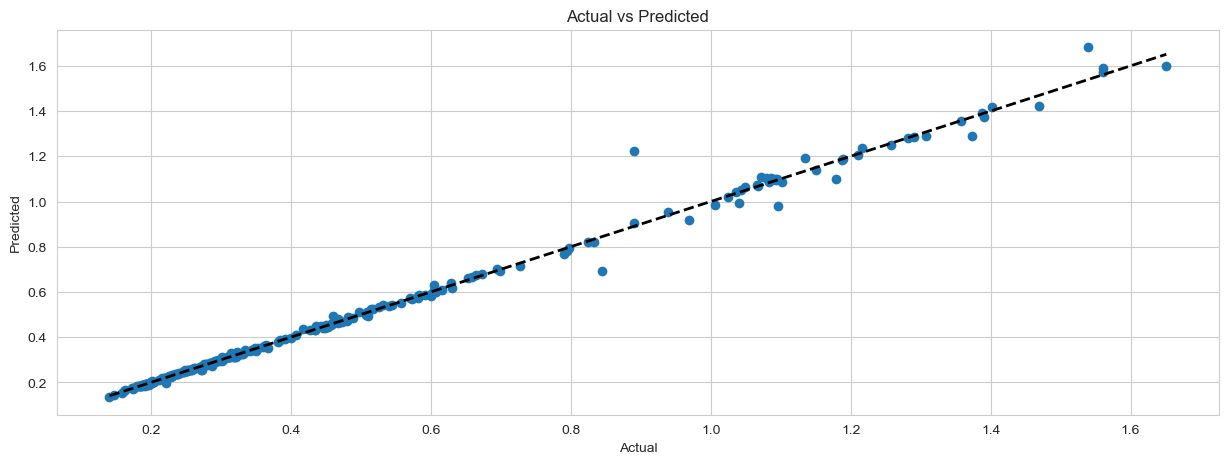

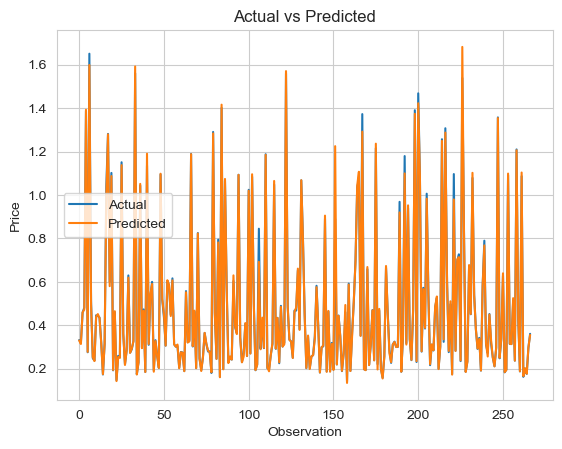

In [23]:
X = df[high_corr_features]
y = df['close']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

plt.figure(figsize=(15, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show();

plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Price')
plt.title('Actual vs Predicted')
plt.legend()
plt.show();

Mean squared error: 0.00
Coefficient of determination: 1.00


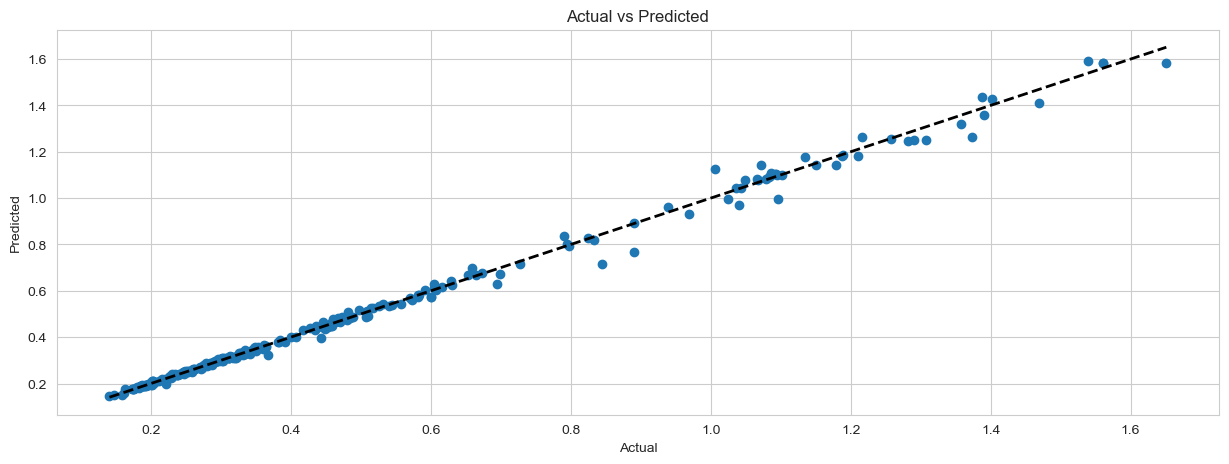

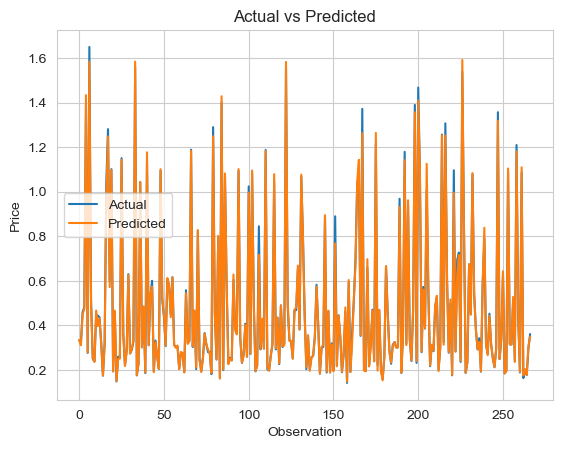

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, rf_y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, rf_y_pred))

plt.figure(figsize=(15, 5))
plt.scatter(y_test, rf_y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show();

plt.plot(y_test.values, label='Actual')
plt.plot(rf_y_pred, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Price')
plt.title('Actual vs Predicted')
plt.legend()
plt.show();